In [1]:
import warnings
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from utility_functions import model_evaluate, preprocess_data

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from xgboost import XGBClassifier

In [2]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_colwidth", 200)

In [3]:
data = pd.read_pickle("data/processed_training_data.pkl")
data.head()

,Tweet,Depressive
0,severely depressed summer seriously thought haveis not depression anymore surpassed first holder new worse mental illness,1
1,like wake panic knowing thing get done today already dreading moment foot touch ground mentalhealthissues anxienty depression,1
2,bpd anxiety depression,1
3,depression make forget trying not gain weight,1
4,really survive depression,1


In [4]:
data.tail()

,Tweet,Depressive
1081861,woke no school best feeling ever,0
1081862,thewdb com cool hear old walt interview,0
1081863,ready mojo makeover ask detail,0
1081864,happy th birthday boo time tupac amaru shakur,0
1081865,happy charitytuesday,0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data["Tweet"], data["Depressive"]
                                                    , test_size=.10
                                                    , stratify=data["Depressive"]
                                                    , random_state=23)

In [6]:
vectorizer = CountVectorizer(ngram_range=(1,2), max_features = 200000)

In [7]:
vectorizer.fit(X_train)

CountVectorizer(max_features=200000, ngram_range=(1, 2))

In [8]:
print("No. of feature_words: ", len(vectorizer.get_feature_names()))

No. of feature_words:  200000


In [9]:
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)
print("Data Transformed.")

Data Transformed.


In [10]:
print(X_train.shape)
print(X_test.shape)

(973679, 200000)
(108187, 200000)


              precision    recall  f1-score   support

           0       0.96      0.99      0.98     87616
           1       0.97      0.81      0.89     20571

    accuracy                           0.96    108187
   macro avg       0.97      0.90      0.93    108187
weighted avg       0.96      0.96      0.96    108187

LR_model training time taken : 133.85776042938232 seconds


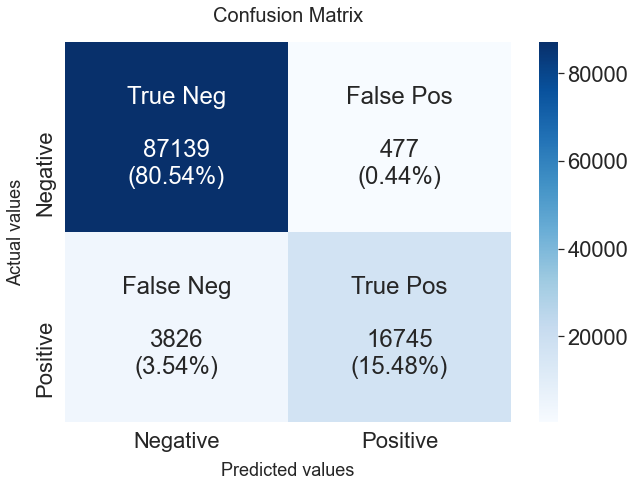

In [11]:
start = time.time()
LR_model = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LR_model.fit(X_train, y_train)
LR_time = time.time() - start
LR_pred = pd.Series(model_evaluate(LR_model,X_test, y_test))
print(f"LR_model training time taken : {LR_time} seconds")

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     87616
           1       0.94      0.81      0.87     20571

    accuracy                           0.96    108187
   macro avg       0.95      0.90      0.92    108187
weighted avg       0.96      0.96      0.95    108187

SVC_model training time taken : 86.63869762420654 seconds


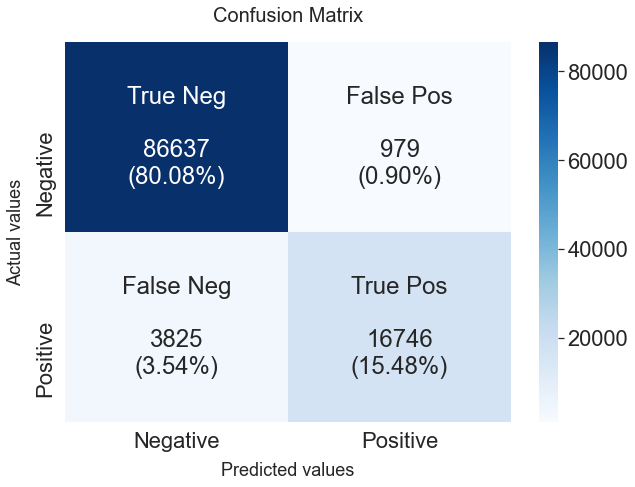

In [12]:
start = time.time()
SVC_model = LinearSVC()
SVC_model.fit(X_train, y_train)
SVC_time = time.time() - start
SVC_pred = pd.Series(model_evaluate(SVC_model, X_test, y_test))
print(f"SVC_model training time taken : {SVC_time} seconds")

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     87616
           1       0.83      0.83      0.83     20571

    accuracy                           0.94    108187
   macro avg       0.90      0.90      0.90    108187
weighted avg       0.94      0.94      0.94    108187

MNB_model training time taken : 0.2589986324310303 seconds


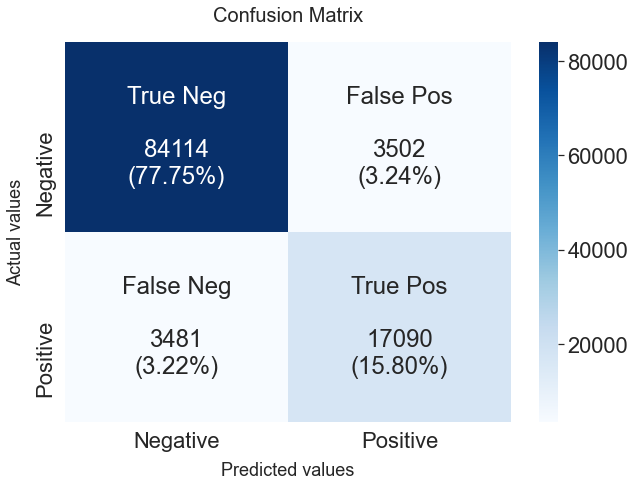

In [13]:
start = time.time()
MNB_model = MultinomialNB()
MNB_model.fit(X_train, y_train)
MNB_time = time.time() - start
MNB_pred = pd.Series(model_evaluate(MNB_model,X_test, y_test))
print(f"MNB_model training time taken : {MNB_time} seconds")

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     87616
           1       0.87      0.80      0.83     20571

    accuracy                           0.94    108187
   macro avg       0.91      0.88      0.90    108187
weighted avg       0.94      0.94      0.94    108187

BNB_model training time taken : 0.31699585914611816 seconds


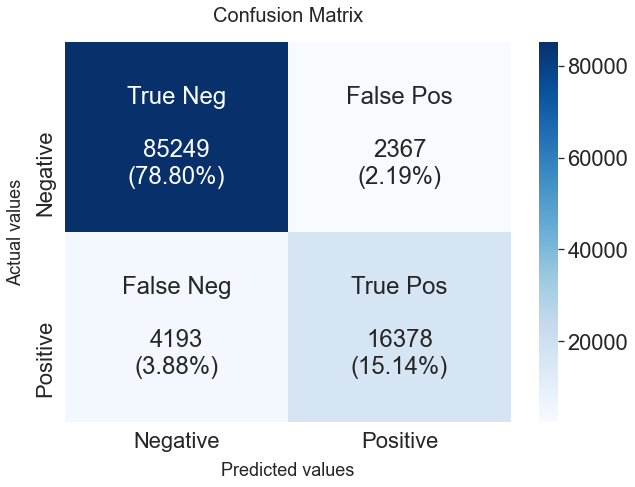

In [14]:
start = time.time()
BNB_model = BernoulliNB()
BNB_model.fit(X_train, y_train)
BNB_time = time.time() - start
BNB_pred = pd.Series(model_evaluate(BNB_model,X_test, y_test))
print(f"BNB_model training time taken : {BNB_time} seconds")

[18:57:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     87616
           1       0.99      0.79      0.88     20571

    accuracy                           0.96    108187
   macro avg       0.97      0.89      0.93    108187
weighted avg       0.96      0.96      0.96    108187

XGB_model training time taken : 226.6824893951416 seconds


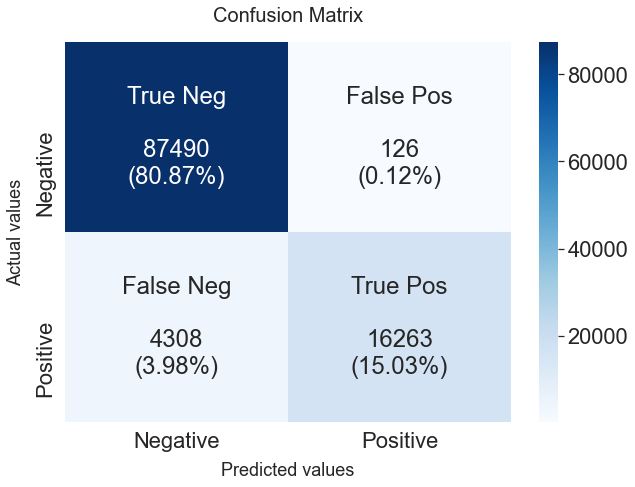

In [15]:
start = time.time()
XGB_model = XGBClassifier(max_depth=5, n_estimators=200)
XGB_model.fit(X_train, y_train)
XGB_time = time.time() - start
XGB_pred = pd.Series(model_evaluate(XGB_model,X_test, y_test))
print(f"XGB_model training time taken : {XGB_time} seconds")

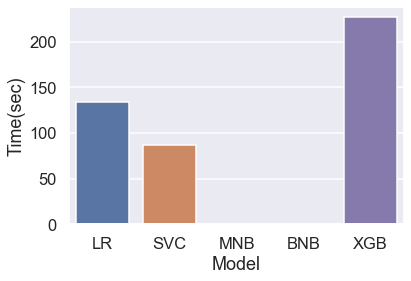

In [16]:
## Training time comparison
sns.set_context("talk", font_scale=1)

xl = ["LR", "SVC", "MNB", "BNB", "XGB"]
yl = [LR_time, SVC_time, MNB_time, BNB_time, XGB_time]

df = pd.DataFrame(list(zip(xl, yl)), columns =["Model", "Time(sec)"])

sns.barplot(x="Model", y="Time(sec)", data=df)
plt.show()

In [17]:
val_data = pd.read_csv("data/validation_tweets.csv")
val_data.head()

,Tweet,Depressive
0,Today in Selfcare: beauty &amp; laughs Kung Fu Panda 3 #Wellness #joy #laughter #selfcare #therapist #philadelphia,0
1,I get to spend New Year's home again alone and lonely. ???•,1
2,"Depressed and lonely /: Stuck in a deep, never ending hole :(",1
3,"If this is your response to someone saying they're dealing with , you're a terrible person.",0
4,Apparently you get a free pass just by mentioning Where was I on the free badge day??!!,0


In [18]:
val_data["Depressive"].value_counts()

0    2357
1     843
Name: Depressive, dtype: int64

In [19]:
text, sentiment = list(val_data["Tweet"]), list(val_data["Depressive"])

In [ ]:
processed_text = preprocess_data(text)

In [ ]:
val_data = pd.DataFrame({"Tweet" : processed_text, "Depressive" : sentiment})
val_data.tail(10)

In [ ]:
val_data.to_pickle("data/processed_validation_data.pkl")

In [ ]:
val_x = val_data.iloc[:, lambda val_x: [0]]
val_y = val_data.iloc[:, lambda val_y: [1]]

In [ ]:
val_x = val_x.squeeze()
val_y = val_y.squeeze()

In [ ]:
val_x = vectorizer.transform(val_x)

In [ ]:
LR_pred_val = pd.Series(model_evaluate(LR_model, val_x, val_y))

In [ ]:
SVC_pred_val = pd.Series(model_evaluate(SVC_model, val_x, val_y))

In [ ]:
MNB_pred_val = pd.Series(model_evaluate(MNB_model, val_x, val_y))

In [ ]:
BNB_pred_val = pd.Series(model_evaluate(BNB_model, val_x, val_y))

In [ ]:
XGB_pred_val = model_evaluate(XGB_model, val_x, val_y)